In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

In [2]:
mpl.style.use('default')

5-neuron network

In [7]:
folderpath = 'randnet_results/exc4_inh1_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/'

In [8]:
exc4_inh1_res = {2: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 4: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 6: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 8: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}
                }

In [9]:
for p in [2, 4, 6, 8]:
    for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        with open(folderpath + f'p{p}_seed{s}_summary.pkl', 'rb') as f:
            res = pickle.load(f)
        exc4_inh1_res[p]['mvgc_aic'].append(res['mvgc_aic'])
        exc4_inh1_res[p]['mvgc_bic'].append(res['mvgc_bic'])
        exc4_inh1_res[p]['attn'].append(res['dec_avg'])
        exc4_inh1_res[p]['r2'].append(res['r2_avg'])

10-neuron network

In [11]:
folderpath = 'randnet_results/exc8_inh2_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/'

In [12]:
exc8_inh2_res = {2: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 4: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 6: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 8: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}
                }

In [13]:
for p in [2, 4, 6, 8]:
    for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        with open(folderpath + f'p{p}_seed{s}_summary.pkl', 'rb') as f:
            res = pickle.load(f)
        exc8_inh2_res[p]['mvgc_aic'].append(res['mvgc_aic'])
        exc8_inh2_res[p]['mvgc_bic'].append(res['mvgc_bic'])
        exc8_inh2_res[p]['attn'].append(res['dec_avg'])
        exc8_inh2_res[p]['r2'].append(res['r2_avg'])

20-neuron network

In [15]:
folderpath = '../results/randnet_results/exc16_inh4_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/'

In [16]:
exc16_inh4_res = {2: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 4: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 6: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 8: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}
                }

In [17]:
for p in [2, 4, 6, 8]:
    for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        with open(folderpath + f'p{p}_seed{s}_summary.pkl', 'rb') as f:
            res = pickle.load(f)
        exc16_inh4_res[p]['mvgc_aic'].append(res['mvgc_aic'])
        exc16_inh4_res[p]['mvgc_bic'].append(res['mvgc_bic'])
        exc16_inh4_res[p]['attn'].append(res['dec_avg'])
        exc16_inh4_res[p]['r2'].append(res['r2_avg'])

40-neuron network

In [18]:
folderpath = 'randnet_results/exc32_inh8_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/'

In [19]:
exc32_inh8_res = {2: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 4: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 6: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}, 
                 8: {'mvgc_aic': [], 'mvgc_bic': [], 'attn':[], 'r2':[]}
                }

In [20]:
for p in [2, 4, 6, 8]:
    for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        with open(folderpath + f'p{p}_seed{s}_summary.pkl', 'rb') as f:
            res = pickle.load(f)
        exc32_inh8_res[p]['mvgc_aic'].append(res['mvgc_aic'])
        exc32_inh8_res[p]['mvgc_bic'].append(res['mvgc_bic'])
        exc32_inh8_res[p]['attn'].append(res['dec_avg'])
        exc32_inh8_res[p]['r2'].append(res['r2_avg'])

Plot all random network results (figure 2 in paper)

In [21]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, np.max(vals))

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, np.min(vals), q1)
    return lower_adjacent_value, upper_adjacent_value

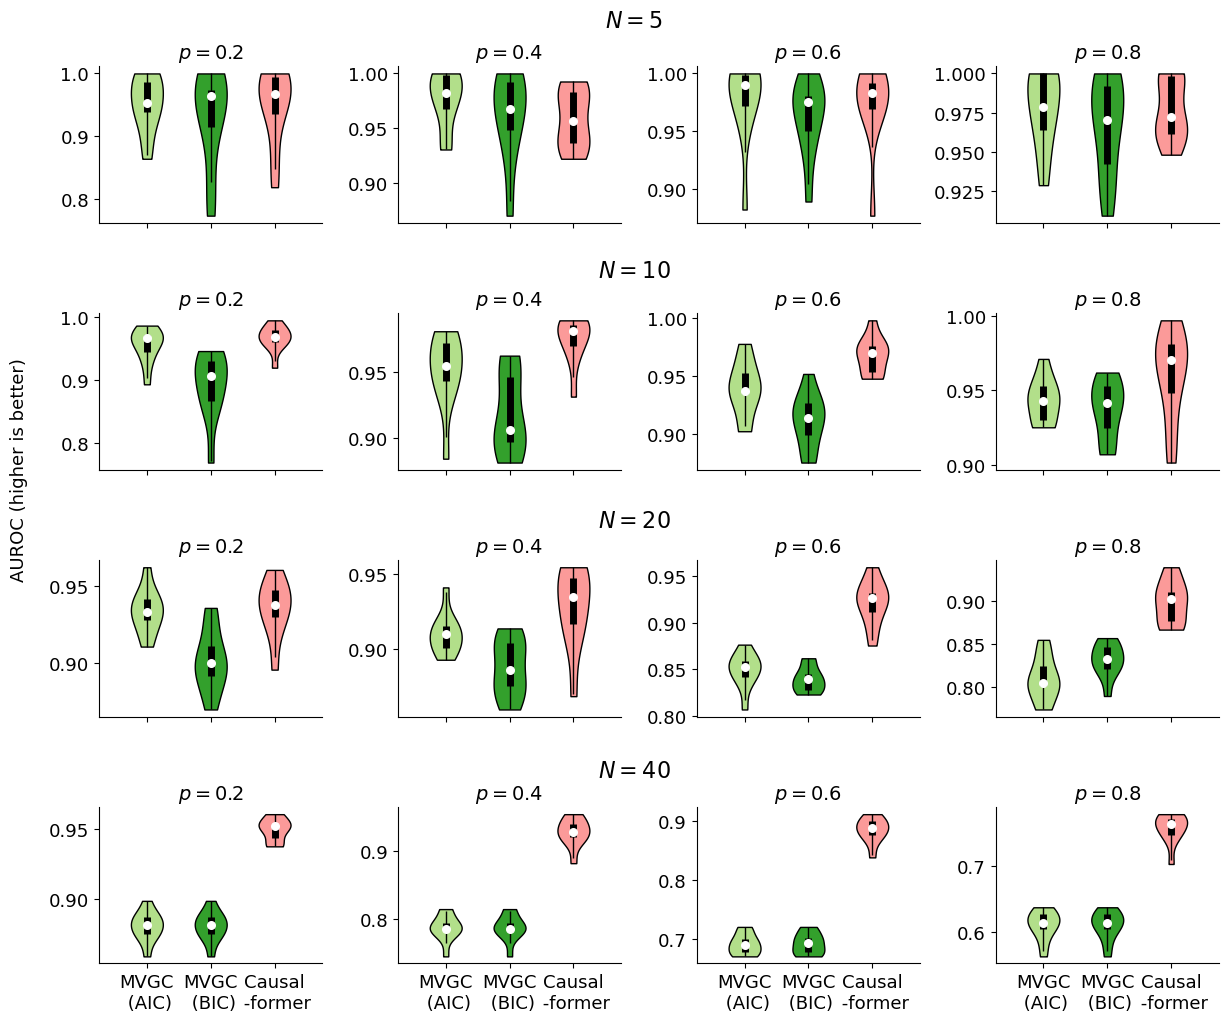

In [22]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10))
labels = ['MVGC\n (AIC)', 'MVGC\n (BIC)', 'Causal\n -former']

fig.text(0.5, 1, r'$N=5$', fontsize=16, ha='center')
resdict = exc4_inh1_res
for i, p in enumerate(resdict.keys()):
    ax = axes[0, i]
    ax.set_title(r'$p={}$'.format(p/10), fontsize=14)
    data = [resdict[p]['mvgc_aic'], resdict[p]['mvgc_bic'], resdict[p]['attn']]
    vplot = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)
    # set color
    cmap = plt.get_cmap('Paired')
    colors = [cmap(2), cmap(3), cmap(4)]
    for patch, color in zip(vplot['bodies'], colors):  
        patch.set_color(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    whiskers = np.array([
    adjacent_values(arr, q1, q3)
    for arr, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
    
    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=[])
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.spines[['top', 'right']].set_visible(False)
    
fig.text(0.5, 0.75, r'$N=10$', fontsize=16, ha='center')
resdict = exc8_inh2_res
for i, p in enumerate(resdict.keys()):
    ax = axes[1, i]
    ax.set_title(r'$p={}$'.format(p/10), fontsize=14)
    data = [resdict[p]['mvgc_aic'], resdict[p]['mvgc_bic'], resdict[p]['attn']]
    vplot = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)
    # set color
    cmap = plt.get_cmap('Paired')
    colors = [cmap(2), cmap(3), cmap(4)]
    for patch, color in zip(vplot['bodies'], colors):  
        patch.set_color(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    whiskers = np.array([
    adjacent_values(arr, q1, q3)
    for arr, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
    
    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=[])
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.spines[['top', 'right']].set_visible(False)

fig.text(0.5, 0.5, r'$N=20$', fontsize=16, ha='center')
resdict = exc16_inh4_res
for i, p in enumerate(resdict.keys()):
    ax = axes[2, i]
    ax.set_title(r'$p={}$'.format(p/10), fontsize=14)
    data = [resdict[p]['mvgc_aic'], resdict[p]['mvgc_bic'], resdict[p]['attn']]
    vplot = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)
    # set color
    cmap = plt.get_cmap('Paired')
    colors = [cmap(2), cmap(3), cmap(4)]
    for patch, color in zip(vplot['bodies'], colors):  
        patch.set_color(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    whiskers = np.array([
    adjacent_values(arr, q1, q3)
    for arr, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
    
    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=[])
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.spines[['top', 'right']].set_visible(False)

fig.text(0.5, 0.25, r'$N=40$', fontsize=16, ha='center')
resdict = exc32_inh8_res
for i, p in enumerate(resdict.keys()):
    ax = axes[3, i]
    ax.set_title(r'$p={}$'.format(p/10), fontsize=14)
    data = [resdict[p]['mvgc_aic'], resdict[p]['mvgc_bic'], resdict[p]['attn']]
    vplot = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)
    # set color
    cmap = plt.get_cmap('Paired')
    colors = [cmap(2), cmap(3), cmap(4)]
    for patch, color in zip(vplot['bodies'], colors):  
        patch.set_color(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    whiskers = np.array([
    adjacent_values(arr, q1, q3)
    for arr, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
    
    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
    
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, fontsize=13)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.spines[['top', 'right']].set_visible(False)

for ax in axes.flatten():
    ax.tick_params(axis='y', which='major', labelsize=13)

fig.text(-0.02, 0.45, 'AUROC (higher is better)', rotation='vertical', fontsize=13)

fig.tight_layout(h_pad=4, w_pad=1)


plt.show()

Plot prediction accuracy of all models (figure 4 (b) in paper)

In [23]:
folderpaths = ['randnet_results/exc4_inh1_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/', 
              'randnet_results/exc8_inh2_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/',
              'randnet_results/exc16_inh4_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/',
              'randnet_results/exc32_inh8_nodiag_withinp_rand/inpvar5_S5_t5000_all_seq10_pred1_res_sett12/']
              
              

In [24]:
r2_all_exp = []

In [25]:
for folderpath in folderpaths:
    for p in [2, 4, 6, 8]:
        for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
            with open(folderpath + f'p{p}_seed{s}_summary.pkl', 'rb') as f:
                res = pickle.load(f)
            r2_all_exp.extend(res['r2_all'])

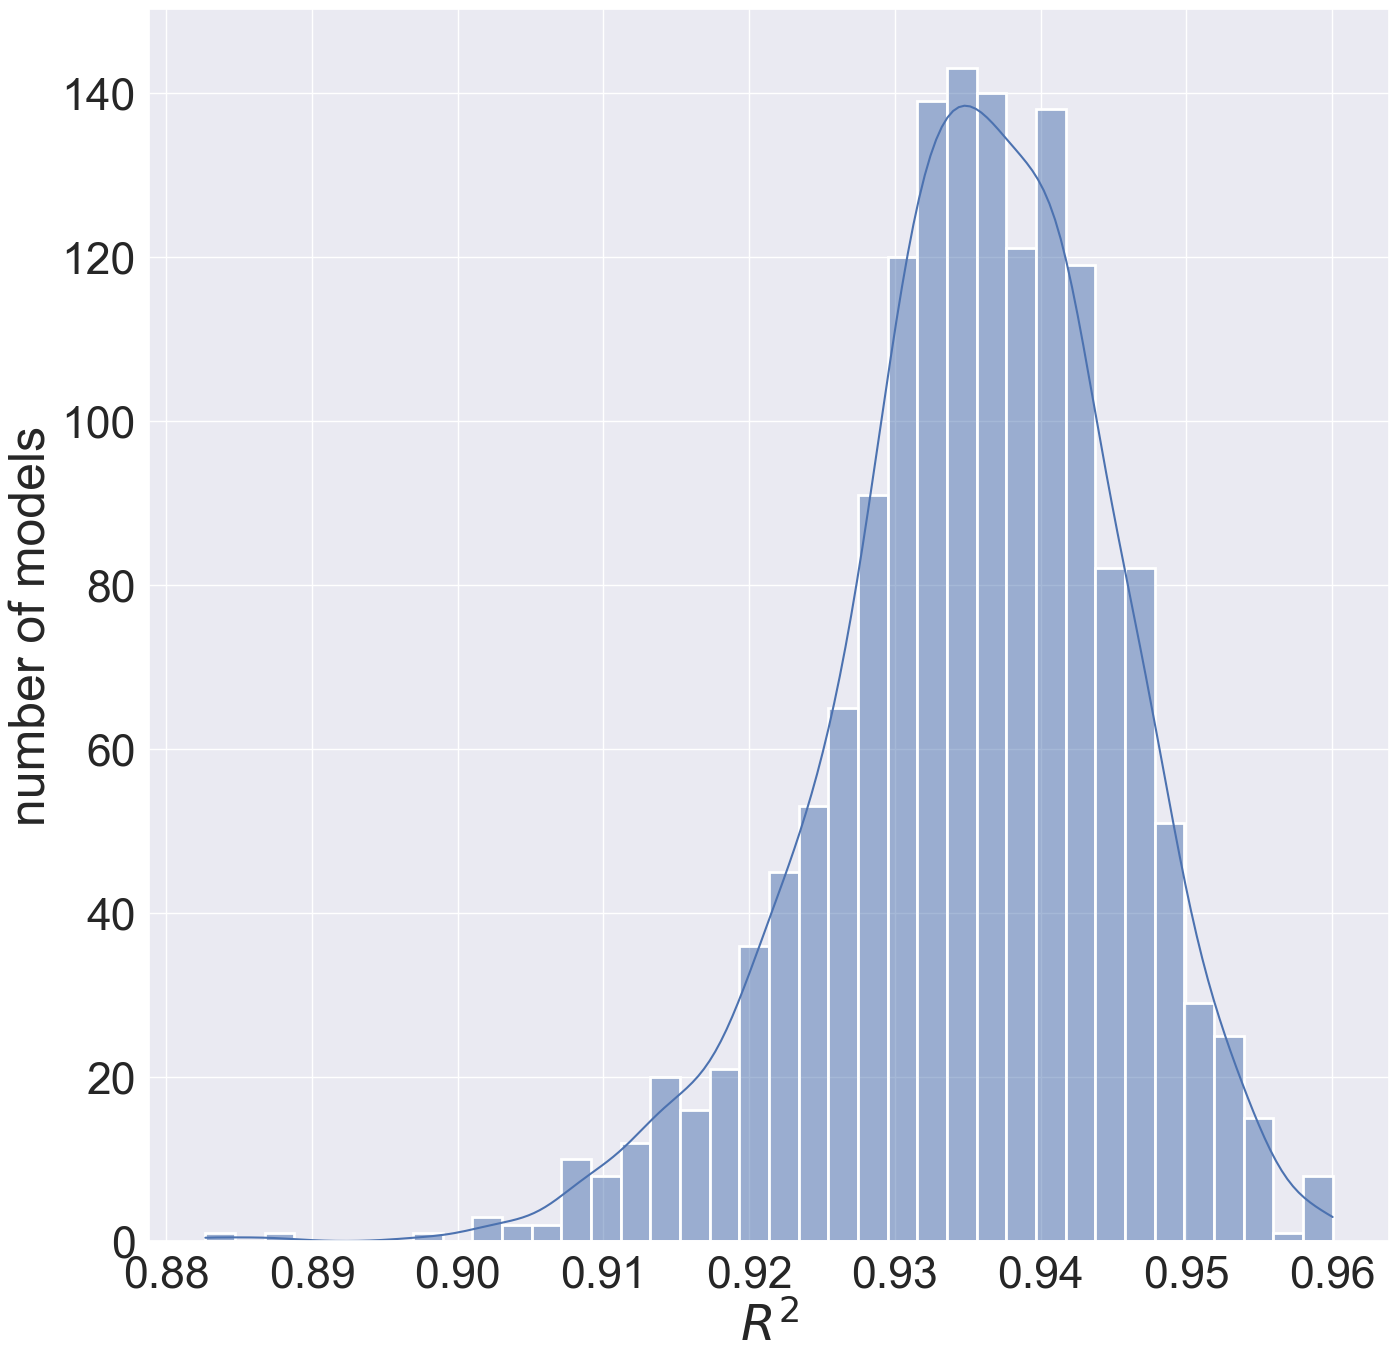

In [26]:
import seaborn as sns
sns.set_theme()
fig, ax = plt.subplots(figsize=(16, 16))
sns.histplot(data=r2_all_exp, kde=True, ax=ax, linewidth=2)

ax.tick_params(axis='both', which='major', labelsize=32)
ax.set_xlabel(r'$R^2$', fontsize=36)
ax.set_ylabel('number of models', fontsize=36)
# ax.grid(True)
plt.show()